# Computer Exercise 1

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import uniform_filter

mandrill = cv2.imread('mandrill.png')
mandrill=mandrill[:,:,::-1]

result1 = cv2.GaussianBlur(mandrill,ksize=(7,7),sigmaX=3, sigmaY=3)
result2 = cv2.GaussianBlur(mandrill,ksize=(21,21),sigmaX=10, sigmaY=10)
result3 = uniform_filter(mandrill,size=21)

None

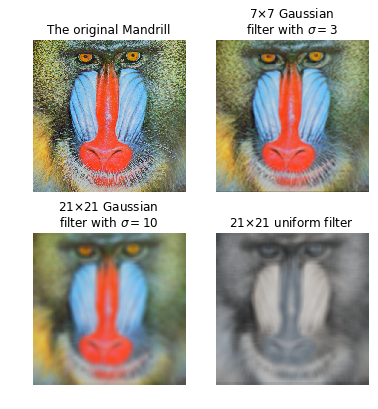

In [2]:

plt.subplot(221)
plt.imshow(mandrill)
plt.title('The original Mandrill')
plt.axis('Off')


plt.subplot(222)
plt.imshow(result1)
plt.title('$7×7$ Gaussian \nfilter with $\sigma=3$')
plt.subplots_adjust(top=1.35)
plt.axis('Off')

plt.subplot(223)
plt.imshow(result2)
plt.title('$21× 21$ Gaussian \nfilter with $\sigma=10$')
plt.axis('Off')

plt.subplot(224)
plt.imshow(result3)
plt.title('$21× 21$ uniform filter')
plt.axis('Off')


#plt.savefig('computerExercise1.jpg',bbox_inches='tight')
plt.show()

# Computer Exercise 2

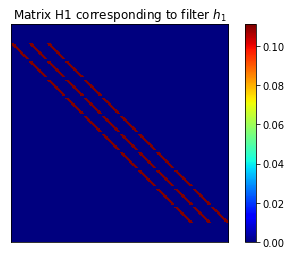

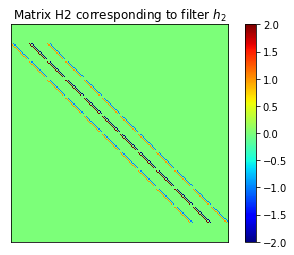

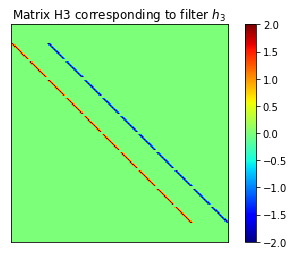

In [3]:
import numpy as np
def H(h):
    H=np.zeros
    
    return (1/np.sqrt(2*np.pi*sigma **2))*np.exp(-x**2-y**2/2*sigma**2)


def H(h):
    M=12
    N=16
    R=np.zeros((0,M*N))
    for i in range(1,M+1):
        for j in range(1,N+1):
            H=np.zeros((M,N))
            if i!=1 and i!=M and j!=1 and j!=N:
                H[i-2, j-2]=h[2,2]
                H[i-2, j-1]=h[2,1]
                H[i-2, j  ]=h[2,0]
                H[i-1, j-2]=h[1,2]
                H[i-1, j-1]=h[1,1]
                H[i-1, j  ]=h[1,0]
                H[i  , j-2]=h[0,2]
                H[i  , j-1]=h[0,1]
                H[i   ,j  ]=h[0,0]
            R=np.vstack((R,H.ravel()))
    return R

h1=np.ones((3,3))/9
h2=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
h3=np.transpose(h2)

H1=H(h1)
H2=H(h2)
H3=H(h3)



plt.plot()
plt.imshow(H1, interpolation=None,cmap="jet")
plt.title('Matrix H1 corresponding to filter $h_1$')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.axis("On")
#plt.savefig('computerExercise2a.jpg',bbox_inches='tight')
plt.show()

plt.plot()
plt.imshow(H2, interpolation=None,cmap="jet")
plt.title('Matrix H2 corresponding to filter $h_2$')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.axis("On")
#plt.savefig('computerExercise2b.jpg',bbox_inches='tight')
plt.show()

plt.plot()
plt.imshow(H3, interpolation=None,cmap="jet")
plt.title('Matrix H3 corresponding to filter $h_3$')
plt.xticks([])
plt.yticks([])
plt.colorbar()


#plt.savefig('computerExercise2c.jpg',bbox_inches='tight')
plt.show()


# Computer Exercise 3

In [4]:
from scipy import linalg
import numpy as np
import scipy.io as sio
mdict = sio.loadmat("are_these_separable_filters.mat" )

K1=mdict['K1']
K2=mdict['K2']
K3=mdict['K3']

U1, s1, Vh1 = linalg.svd(K1)
U2, s2, Vh2 = linalg.svd(K2)
U3, s3, Vh3 = linalg.svd(K3)

fil1_sep = np.allclose([s1[0], 0, 0, 0, 0], s1, rtol=0, atol=10**(-12))
fil2_sep = np.allclose([s2[0], 0, 0, 0, 0], s2, rtol=0, atol=10**(-12))
fil3_sep = np.allclose([s3[0], 0, 0, 0, 0], s3, rtol=0, atol=10**(-12))

print('K1 is seperable: ',fil1_sep)
print('K2 is seperable: ',fil2_sep)
print('K3 is seperable: ',fil3_sep)

K1 is seperable:  True
K2 is seperable:  False
K3 is seperable:  False


#  Computer Exercise 4

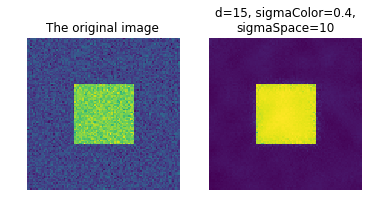

In [5]:
import scipy.io as sio
from matplotlib import pyplot as plt
import cv2
mdict=sio.loadmat("bilateral.mat") 
# print([k for k in mdict.keys() if not k.startswith("__")])
src=mdict['img_noisy']

plt.subplot(1,2,1)
plt.imshow(src)
plt.title("The original image")
plt.axis('Off')

A=[15]
B=[0.4]
C=[10]
for a in range(len(A)):
    # print('a = ',A[a])
    for b in range(len(B)):
        for c in range(len(C)):
            res=cv2.bilateralFilter(src, d=A[a],sigmaColor=B[b],sigmaSpace=C[c])
            # plt.subplot(len(B),len(C),len(C)*b+c+1)
            # plt.imshow(res)
            # plt.axis('Off')
            # plt.title('b={},c={}'.format(B[b],C[c]))
    # plt.show()


plt.subplot(1,2,2)
plt.imshow(res)
plt.title("d=15, sigmaColor=0.4,\nsigmaSpace=10")
plt.axis('Off')
#plt.savefig('computerExercise4.jpg',bbox_inches='tight')
plt.show()

# Computer Exercise 5

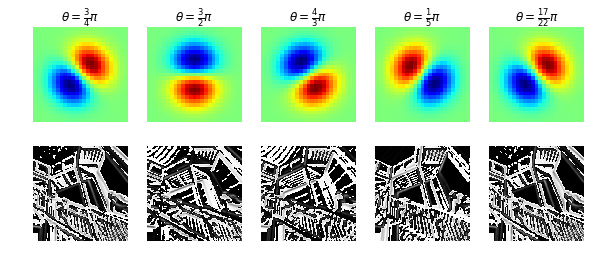

In [6]:
import numpy as np
from scipy.ndimage import convolve
import cv2
from matplotlib import pyplot as plt

def g(x,y,sigma):
    return (1/np.sqrt(2*np.pi*(sigma **2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))

def gdx(x,y,sigma):
    return (-x/sigma**2)*g(x,y,sigma)

def gdy(x,y,sigma):
    return (-y/sigma**2)*g(x,y,sigma)

def direc(x,y,sigma,theta):
    return (np.cos(theta))*(gdx(x,y,sigma))+np.sin(theta)*gdy(x,y,sigma)


ascent=cv2.imread('ascent.jpg',0)

step=1
sigma=step*4
y,x = np.mgrid[-12*step:13*step:step,-12*step:13*step:step]

numerators  =[3,3,4,1,17]
denumerators=[4,2,3,5,22]

for i,(numerator,denumerator) in enumerate(zip(numerators,denumerators),1):
    plt.subplot(2,5,i)
    plt.title(r'$\theta=\frac{{{}}}{{{}}}\pi$'.format(numerator,denumerator))
    filt=direc(x,y,sigma,theta=(numerator/denumerator)*np.pi)
    plt.imshow(filt,cmap='jet')
    plt.axis('Off')
    plt.subplots_adjust(left=None, bottom=None, right=1.4, top=None, wspace=None, hspace=None)
    
    plt.subplot(2,5,i+5)
    plt.imshow(convolve(ascent,filt),cmap='gray',interpolation=None)
    plt.axis('Off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

plt.savefig('computerExercise5.jpg',bbox_inches='tight')
plt.show()

# Computer Exercise 6

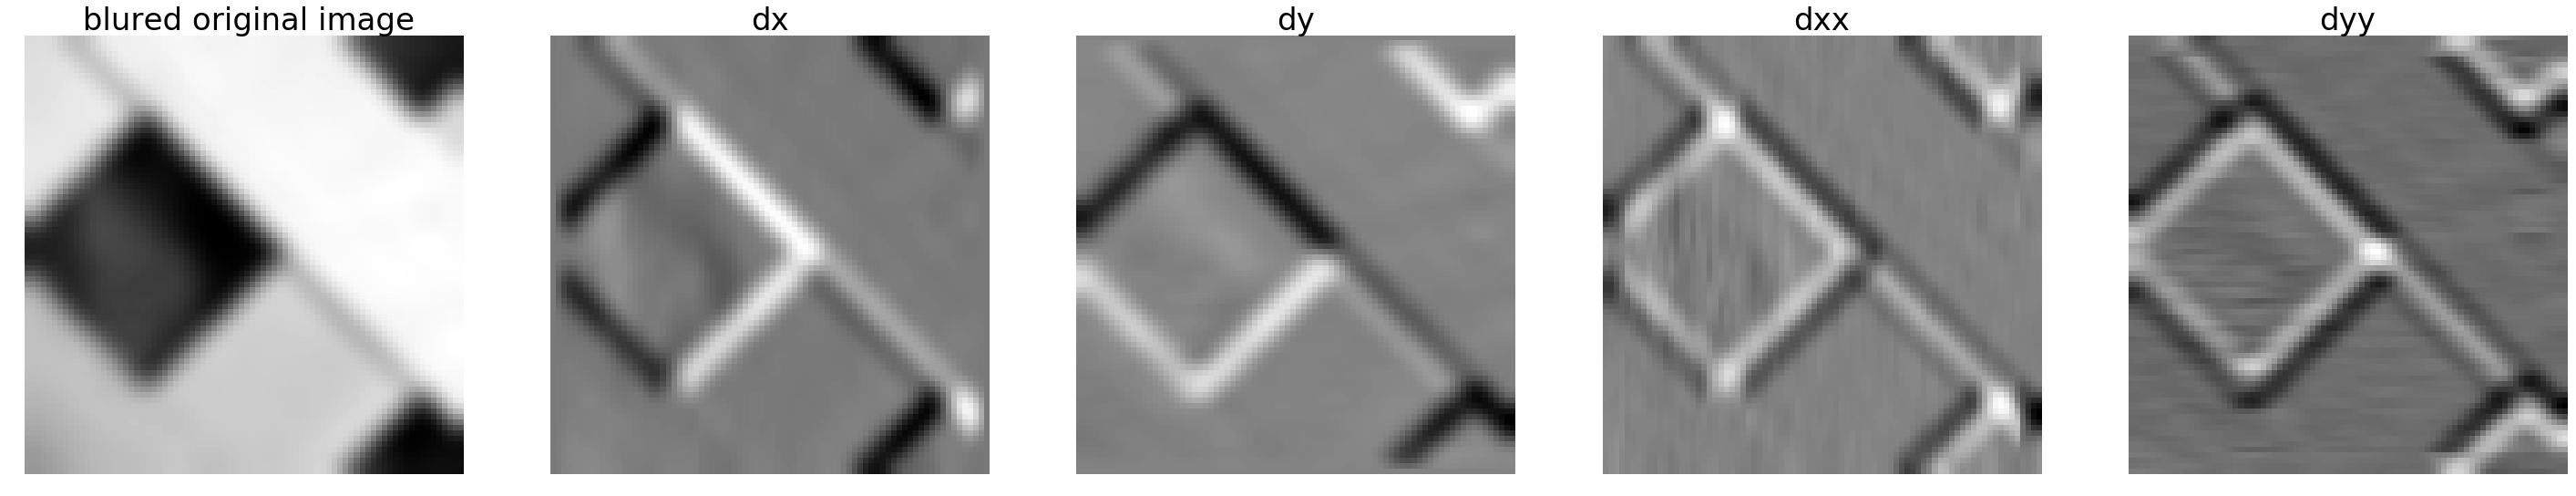

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import cv2

def convolve(filter_dict, src_img):
    plt.figure(figsize=(50, 40))
    img = np.float32(src_img)
    col_ind = 2
    plt.subplot(1, len(filter_dict)+1, 1), 
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.title(' blured original image', fontsize = 34)
    for kernel_name, kernel in filter_dict.items():
        output = cv2.filter2D(img, -1, kernel)
        plt.subplot(1, len(filter_dict)+1, col_ind)
        plt.imshow(output, cmap = 'gray')
        plt.title(kernel_name, fontsize = 34)
        plt.axis('off')
        col_ind +=1  
    #plt.savefig('computerExercise6.jpg',bbox_inches='tight')
    plt.show()

dx1, dx2 = cv2.getDerivKernels(1,0,3)
dy1, dy2 = cv2.getDerivKernels(0,1,3)
dxx1, dxx2 = cv2.getDerivKernels(2,0,3)
dyy1, dyy2 = cv2.getDerivKernels(0,2,3)

filter_dict = {'dx' :dx2.dot(dx1.T),
               'dy' :dy2.dot(dy1.T),
               'dxx' :dxx2.dot(dxx1.T),
               'dyy' :dyy2.dot(dyy1.T)
              }

mdict=sio.loadmat("imgs_for_optical_flow.mat")
filt=g(x,y,2)
img1=mdict['img1']
blured_img1 = cv2.GaussianBlur(img1, (7,7),3)

convolve(filter_dict, blured_img1)